In [24]:
import warnings
warnings.filterwarnings('ignore')
import requests
# from bs4 import BeautifulSoup
from datetime import datetime as dt

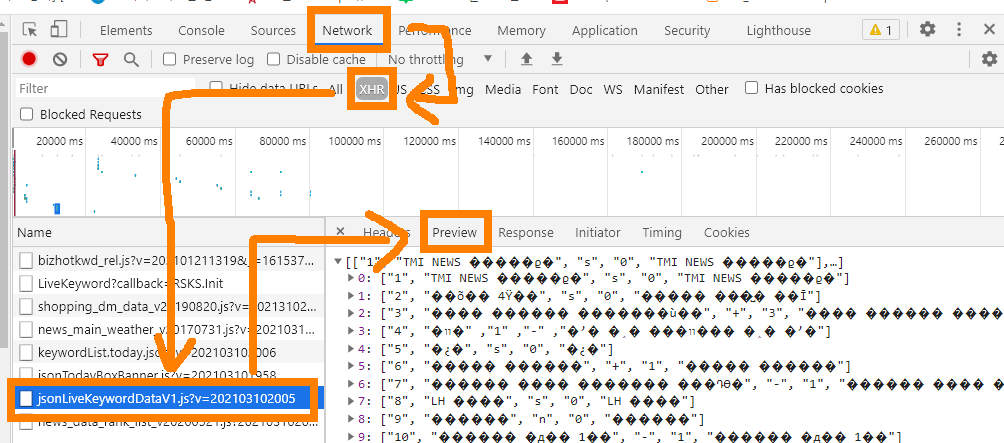

In [25]:
from IPython.display import Image
Image('./nateAjax_1.png', width = '1100')

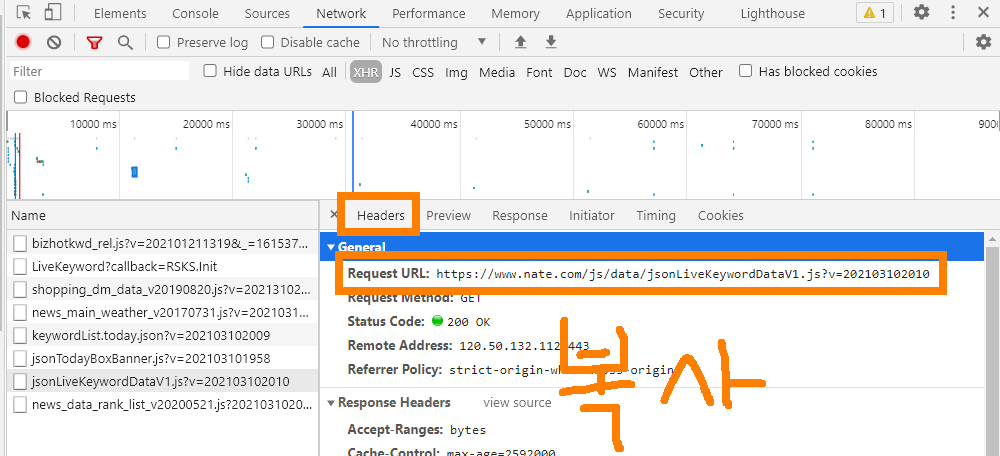

In [26]:
from IPython.display import Image
Image('./nateAjax_2.png', width = '1100')

In [27]:
# 실시간 검색어가 웹 페이지에 전부 혹은 일부가 포함되어있지 않고 ajax를 이용해서 받아오는 방식을 사용한다.
# Request Method가 GET 이므로 requests 모듈의 get() 메소드를 사용해서 실시간 검색어를 얻어온다.
targetSite = 'https://www.nate.com/js/data/jsonLiveKeywordDataV1.js?v=202103102015'
request = requests.get(targetSite)
print(request)

<Response [200]>


In [28]:
issues = request.text
print(type(issues)) # ajax로 처리되는 데이터는 무조건 문자열 형태로 얻어온다.
print(issues)

<class 'str'>
[["1",  "TMI NEWS 브레이브걸스",  "s",  "0",  "TMI NEWS 브레이브걸스"], ["2",  "아이즈원",  "+",  "3",  "아이즈원"], ["3",  "생생정보",  "-",  "1",  "생생정보"], ["4",  "두산 2군 전원 코로나",  "-",  "1",  "두산 2군 전원 코로나"], ["5",  "그것이 알고 싶다",  "-",  "1",  "그것이 알고 싶다"], ["6",  "LH 투기",  "+",  "1",  "투기 의혹"], ["7",  "방위비 분담금 13.9%",  "+",  "1",  "방위비 분담금 13.9%"], ["8",  "생방송 투데이",  "+",  "1",  "생방송 투데이"], ["9",  "밥이 되어라",  "n",  "0",  "밥이 되어라"], ["10",  "최유나",  "s",  "0",  "최유나"]]


In [29]:
# requests 모듈의 json() 메소드로 서버에 요청해서 전달받은 데이터를 파이썬에서 처리할 수 있는 리스트나 딕셔너리 타입으로
# 변환한다. 데이터가 []로 묶여 있으면 리스트로 {}로 묶여있으면 딕셔너리로 자동 변환해준다.
ranks = request.json()
print(type(ranks))
print(ranks)

<class 'list'>
[['1', 'TMI NEWS 브레이브걸스', 's', '0', 'TMI NEWS 브레이브걸스'], ['2', '아이즈원', '+', '3', '아이즈원'], ['3', '생생정보', '-', '1', '생생정보'], ['4', '두산 2군 전원 코로나', '-', '1', '두산 2군 전원 코로나'], ['5', '그것이 알고 싶다', '-', '1', '그것이 알고 싶다'], ['6', 'LH 투기', '+', '1', '투기 의혹'], ['7', '방위비 분담금 13.9%', '+', '1', '방위비 분담금 13.9%'], ['8', '생방송 투데이', '+', '1', '생방송 투데이'], ['9', '밥이 되어라', 'n', '0', '밥이 되어라'], ['10', '최유나', 's', '0', '최유나']]


In [30]:
import json
# json 문자열 형태로 얻어온 데이터를 json 모듈의 loads() 메소드를 사용해서 파이썬에서 처리할 수 있는 리스트나 딕셔너리 타입으로
# 변환한다. 데이터가 []로 묶여 있으면 리스트로 {}로 묶여있으면 딕셔너리로 자동 변환해준다.
ranks = json.loads(issues)
print(type(ranks))
print(ranks)

<class 'list'>
[['1', 'TMI NEWS 브레이브걸스', 's', '0', 'TMI NEWS 브레이브걸스'], ['2', '아이즈원', '+', '3', '아이즈원'], ['3', '생생정보', '-', '1', '생생정보'], ['4', '두산 2군 전원 코로나', '-', '1', '두산 2군 전원 코로나'], ['5', '그것이 알고 싶다', '-', '1', '그것이 알고 싶다'], ['6', 'LH 투기', '+', '1', '투기 의혹'], ['7', '방위비 분담금 13.9%', '+', '1', '방위비 분담금 13.9%'], ['8', '생방송 투데이', '+', '1', '생방송 투데이'], ['9', '밥이 되어라', 'n', '0', '밥이 되어라'], ['10', '최유나', 's', '0', '최유나']]


In [31]:
for rank in ranks:
    # print(rank)
    print('{0:2d}. {1}'.format(int(rank[0]), rank[1]), end = ' ')
    if rank[2] == '+':
        print('↑' + rank[3])
    elif rank[2] == '-':
        print('↓' + rank[3])
    elif rank[2].lower() == 's':
        print('-')
    else:
        print('new')

 1. TMI NEWS 브레이브걸스 -
 2. 아이즈원 ↑3
 3. 생생정보 ↓1
 4. 두산 2군 전원 코로나 ↓1
 5. 그것이 알고 싶다 ↓1
 6. LH 투기 ↑1
 7. 방위비 분담금 13.9% ↑1
 8. 생방송 투데이 ↑1
 9. 밥이 되어라 new
10. 최유나 -
